# Kevin Cooper | Final Project

In [1]:
from pymc3 import glm
import pymc3 as pm
import patsy
import arviz as az
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm

sns.set_style(style="darkgrid", rc={
              "axes.facecolor": ".9", "grid.color": ".8"})
sns.set_palette(palette="deep")
sns_c = sns.color_palette(palette="deep")


plt.rcParams["figure.figsize"] = [7, 6]
plt.rcParams["figure.dpi"] = 100

In [2]:
early_standard_2021 = pd.read_csv("./data/early_season_standard_2021.csv")
early_standard_2021[["Year"]] = 2021

early_standard_2019 = pd.read_csv("./data/early_season_standard_2019.csv")
early_standard_2019[["Year"]] = 2019

early_standard_2018 = pd.read_csv("./data/early_season_standard_2018.csv")
early_standard_2018[["Year"]] = 2018

early_standard_2017 = pd.read_csv("./data/early_season_standard_2017.csv")
early_standard_2017[["Year"]] = 2017

early_standard_2016 = pd.read_csv("./data/early_season_standard_2016.csv")
early_standard_2016[["Year"]] = 2016

early_standard_2015 = pd.read_csv("./data/early_season_standard_2015.csv")
early_standard_2015[["Year"]] = 2015

early_standard_2014 = pd.read_csv("./data/early_season_standard_2014.csv")
early_standard_2014[["Year"]] = 2014

early_standard_2013 = pd.read_csv("./data/early_season_standard_2013.csv")
early_standard_2013[["Year"]] = 2013

early_standard_2012 = pd.read_csv("./data/early_season_standard_2012.csv")
early_standard_2012[["Year"]] = 2012

early_standard_2011 = pd.read_csv("./data/early_season_standard_2011.csv")
early_standard_2011[["Year"]] = 2011

early_standard_2010 = pd.read_csv("./data/early_season_standard_2010.csv")
early_standard_2010[["Year"]] = 2010

early_standard_2009 = pd.read_csv("./data/early_season_standard_2009.csv")
early_standard_2009[["Year"]] = 2009

early_standard_2008 = pd.read_csv("./data/early_season_standard_2008.csv")
early_standard_2008[["Year"]] = 2008

early_standard_2007 = pd.read_csv("./data/early_season_standard_2007.csv")
early_standard_2007[["Year"]] = 2007

early_standard_2006 = pd.read_csv("./data/early_season_standard_2006.csv")
early_standard_2006[["Year"]] = 2006

early_standard_2005 = pd.read_csv("./data/early_season_standard_2005.csv")
early_standard_2005[["Year"]] = 2005

early_standard_2004 = pd.read_csv("./data/early_season_standard_2004.csv")
early_standard_2004[["Year"]] = 2004

early_standard_2003 = pd.read_csv("./data/early_season_standard_2003.csv")
early_standard_2003[["Year"]] = 2003

early_standard_2002 = pd.read_csv("./data/early_season_standard_2002.csv")
early_standard_2002[["Year"]] = 2002

early_standard_2001 = pd.read_csv("./data/early_season_standard_2001.csv")
early_standard_2001[["Year"]] = 2001

early_standard = pd.concat(
    [early_standard_2021,
     early_standard_2019,
     early_standard_2018,
     early_standard_2017,
     early_standard_2016,
     early_standard_2015,
     early_standard_2014,
     early_standard_2013,
     early_standard_2012,
     early_standard_2011,
     early_standard_2010,
     early_standard_2009,
     early_standard_2008,
     early_standard_2007,
     early_standard_2006,
     early_standard_2005,
     early_standard_2004,
     early_standard_2003,
     early_standard_2002,
     early_standard_2001
    ])

early_standard = early_standard.rename(columns={"BB%": "BB_pct", "K%": "K_pct", "wRC+": "wRC_plus"})

early_standard["BB_pct"] = early_standard["BB_pct"].str.replace("%", "").astype("float64") / 100
early_standard["K_pct"] = early_standard["K_pct"].str.replace("%", "").astype("float64") / 100

early_standard.head()

Name Team   G   PA  HR   R  RBI  SB  BB_pct  K_pct  ...  \
0             Mike Trout  LAA  21   88   6  18   14   0   0.159  0.261  ...   
1       Ronald Acuna Jr.  ATL  24  106   8  25   18   3   0.142  0.132  ...   
2          J.D. Martinez  BOS  25  107   9  21   25   0   0.112  0.215  ...   
3  Vladimir Guerrero Jr.  TOR  24  102   7  16   20   1   0.196  0.157  ...   
4            Kris Bryant  CHC  24  102   7  19   19   0   0.127  0.225  ...   

     SLG   wOBA  xwOBA  wRC_plus  BsR   Off  Def  WAR  playerid  Year  
0  0.781  0.532    NaN       245  0.7  16.4  0.1  1.9     10155  2021  
1  0.705  0.472    NaN       196  1.4  14.4  0.1  1.8     18401  2021  
2  0.745  0.484    NaN       209 -0.5  13.7 -1.9  1.5      6184  2021  
3  0.663  0.481    NaN       207 -0.2  13.2 -1.6  1.5     19611  2021  
4  0.667  0.446    NaN       180  0.5  10.8 -1.1  1.3     15429  2021  

[5 rows x 24 columns]

In [3]:
end_standard_2021 = pd.read_csv("./data/end_of_season_standard_2021.csv")
end_standard_2021[["Year"]] = 2021

end_standard_2019 = pd.read_csv("./data/end_of_season_standard_2019.csv")
end_standard_2019[["Year"]] = 2019

end_standard_2018 = pd.read_csv("./data/end_of_season_standard_2018.csv")
end_standard_2018[["Year"]] = 2018

end_standard_2017 = pd.read_csv("./data/end_of_season_standard_2017.csv")
end_standard_2017[["Year"]] = 2017

end_standard_2016 = pd.read_csv("./data/end_of_season_standard_2016.csv")
end_standard_2016[["Year"]] = 2016

end_standard_2015 = pd.read_csv("./data/end_of_season_standard_2015.csv")
end_standard_2015[["Year"]] = 2015

end_standard_2014 = pd.read_csv("./data/end_of_season_standard_2014.csv")
end_standard_2014[["Year"]] = 2014

end_standard_2013 = pd.read_csv("./data/end_of_season_standard_2013.csv")
end_standard_2013[["Year"]] = 2013

end_standard_2012 = pd.read_csv("./data/end_of_season_standard_2012.csv")
end_standard_2012[["Year"]] = 2012

end_standard_2011 = pd.read_csv("./data/end_of_season_standard_2011.csv")
end_standard_2011[["Year"]] = 2011

end_standard_2010 = pd.read_csv("./data/end_of_season_standard_2010.csv")
end_standard_2010[["Year"]] = 2010

end_standard_2009 = pd.read_csv("./data/end_of_season_standard_2009.csv")
end_standard_2009[["Year"]] = 2009

end_standard_2008 = pd.read_csv("./data/end_of_season_standard_2008.csv")
end_standard_2008[["Year"]] = 2008

end_standard_2007 = pd.read_csv("./data/end_of_season_standard_2007.csv")
end_standard_2007[["Year"]] = 2007

end_standard_2006 = pd.read_csv("./data/end_of_season_standard_2006.csv")
end_standard_2006[["Year"]] = 2006

end_standard_2005 = pd.read_csv("./data/end_of_season_standard_2005.csv")
end_standard_2005[["Year"]] = 2005

end_standard_2004 = pd.read_csv("./data/end_of_season_standard_2004.csv")
end_standard_2004[["Year"]] = 2004

end_standard_2003 = pd.read_csv("./data/end_of_season_standard_2003.csv")
end_standard_2003[["Year"]] = 2003

end_standard_2002 = pd.read_csv("./data/end_of_season_standard_2002.csv")
end_standard_2002[["Year"]] = 2002

end_standard_2001 = pd.read_csv("./data/end_of_season_standard_2001.csv")
end_standard_2001[["Year"]] = 2001

end_standard = pd.concat(
    [end_standard_2021,
     end_standard_2019,
     end_standard_2018,
     end_standard_2017,
     end_standard_2016,
     end_standard_2015,
     end_standard_2014,
     end_standard_2013,
     end_standard_2012,
     end_standard_2011,
     end_standard_2010,
     end_standard_2009,
     end_standard_2008,
     end_standard_2007,
     end_standard_2006,
     end_standard_2005,
     end_standard_2004,
     end_standard_2003,
     end_standard_2002,
     end_standard_2001,
    ])

end_standard = end_standard.rename(columns={"BB%": "BB_pct", "K%": "K_pct", "wRC+": "wRC_plus", "wOBA": "wOBA_EOS"})

end_standard["BB_pct"] = end_standard["BB_pct"].str.replace("%", "").astype("float64") / 100
end_standard["K_pct"] = end_standard["K_pct"].str.replace("%", "").astype("float64") / 100

end_standard.head()

Name   Team    G   PA  HR    R  RBI  SB  BB_pct  K_pct  \
0            Trea Turner  - - -  148  646  28  107   77  32   0.063  0.170   
1  Vladimir Guerrero Jr.    TOR  161  698  48  123  111   4   0.123  0.158   
2           Bryce Harper    PHI  141  599  35  101   84  13   0.167  0.224   
3          Marcus Semien    TOR  162  724  45  115  102  15   0.091  0.202   
4              Juan Soto    WSN  151  654  29  111   95   9   0.222  0.142   

   ...    SLG  wOBA_EOS  xwOBA  wRC_plus  BsR   Off   Def  WAR  playerid  Year  
0  ...  0.536     0.386  0.362       142  5.0  39.5   7.6  6.9     16252  2021  
1  ...  0.601     0.419  0.416       166 -2.1  54.1 -11.1  6.7     19611  2021  
2  ...  0.615     0.431  0.430       170 -2.5  50.7  -4.4  6.6     11579  2021  
3  ...  0.538     0.368  0.331       131  4.0  31.5  10.0  6.6     12533  2021  
4  ...  0.534     0.420  0.430       163 -3.3  48.8  -4.3  6.6     20123  2021  

[5 rows x 24 columns]

In [4]:
base_df = early_standard[['playerid', 'Year', 'G', 'PA', 'HR', 'R', 'RBI', 'BB_pct', 'K_pct',
                          'ISO', 'BABIP', 'AVG', 'OBP', 'SLG', 'wOBA']].set_index(["playerid", "Year"]).join(end_standard[["playerid", "Year", "wOBA_EOS"]].set_index(["playerid", "Year"]), how="inner")
base_df.head()

G   PA  HR   R  RBI  BB_pct  K_pct    ISO  BABIP    AVG  \
playerid Year                                                             
6184     2021  25  107   9  21   25   0.112  0.215  0.394  0.387  0.351   
19611    2021  24  102   7  16   20   0.196  0.157  0.313  0.368  0.350   
15429    2021  24  102   7  19   19   0.127  0.225  0.345  0.362  0.322   
5235     2021  25  110   6  17   20   0.118  0.218  0.266  0.379  0.330   
11739    2021  25   87   2   9   11   0.115  0.195  0.178  0.400  0.329   

                 OBP    SLG   wOBA  wOBA_EOS  
playerid Year                                 
6184     2021  0.430  0.745  0.484     0.364  
19611    2021  0.490  0.663  0.481     0.419  
15429    2021  0.412  0.667  0.446     0.356  
5235     2021  0.409  0.596  0.421     0.358  
11739    2021  0.425  0.507  0.398     0.336

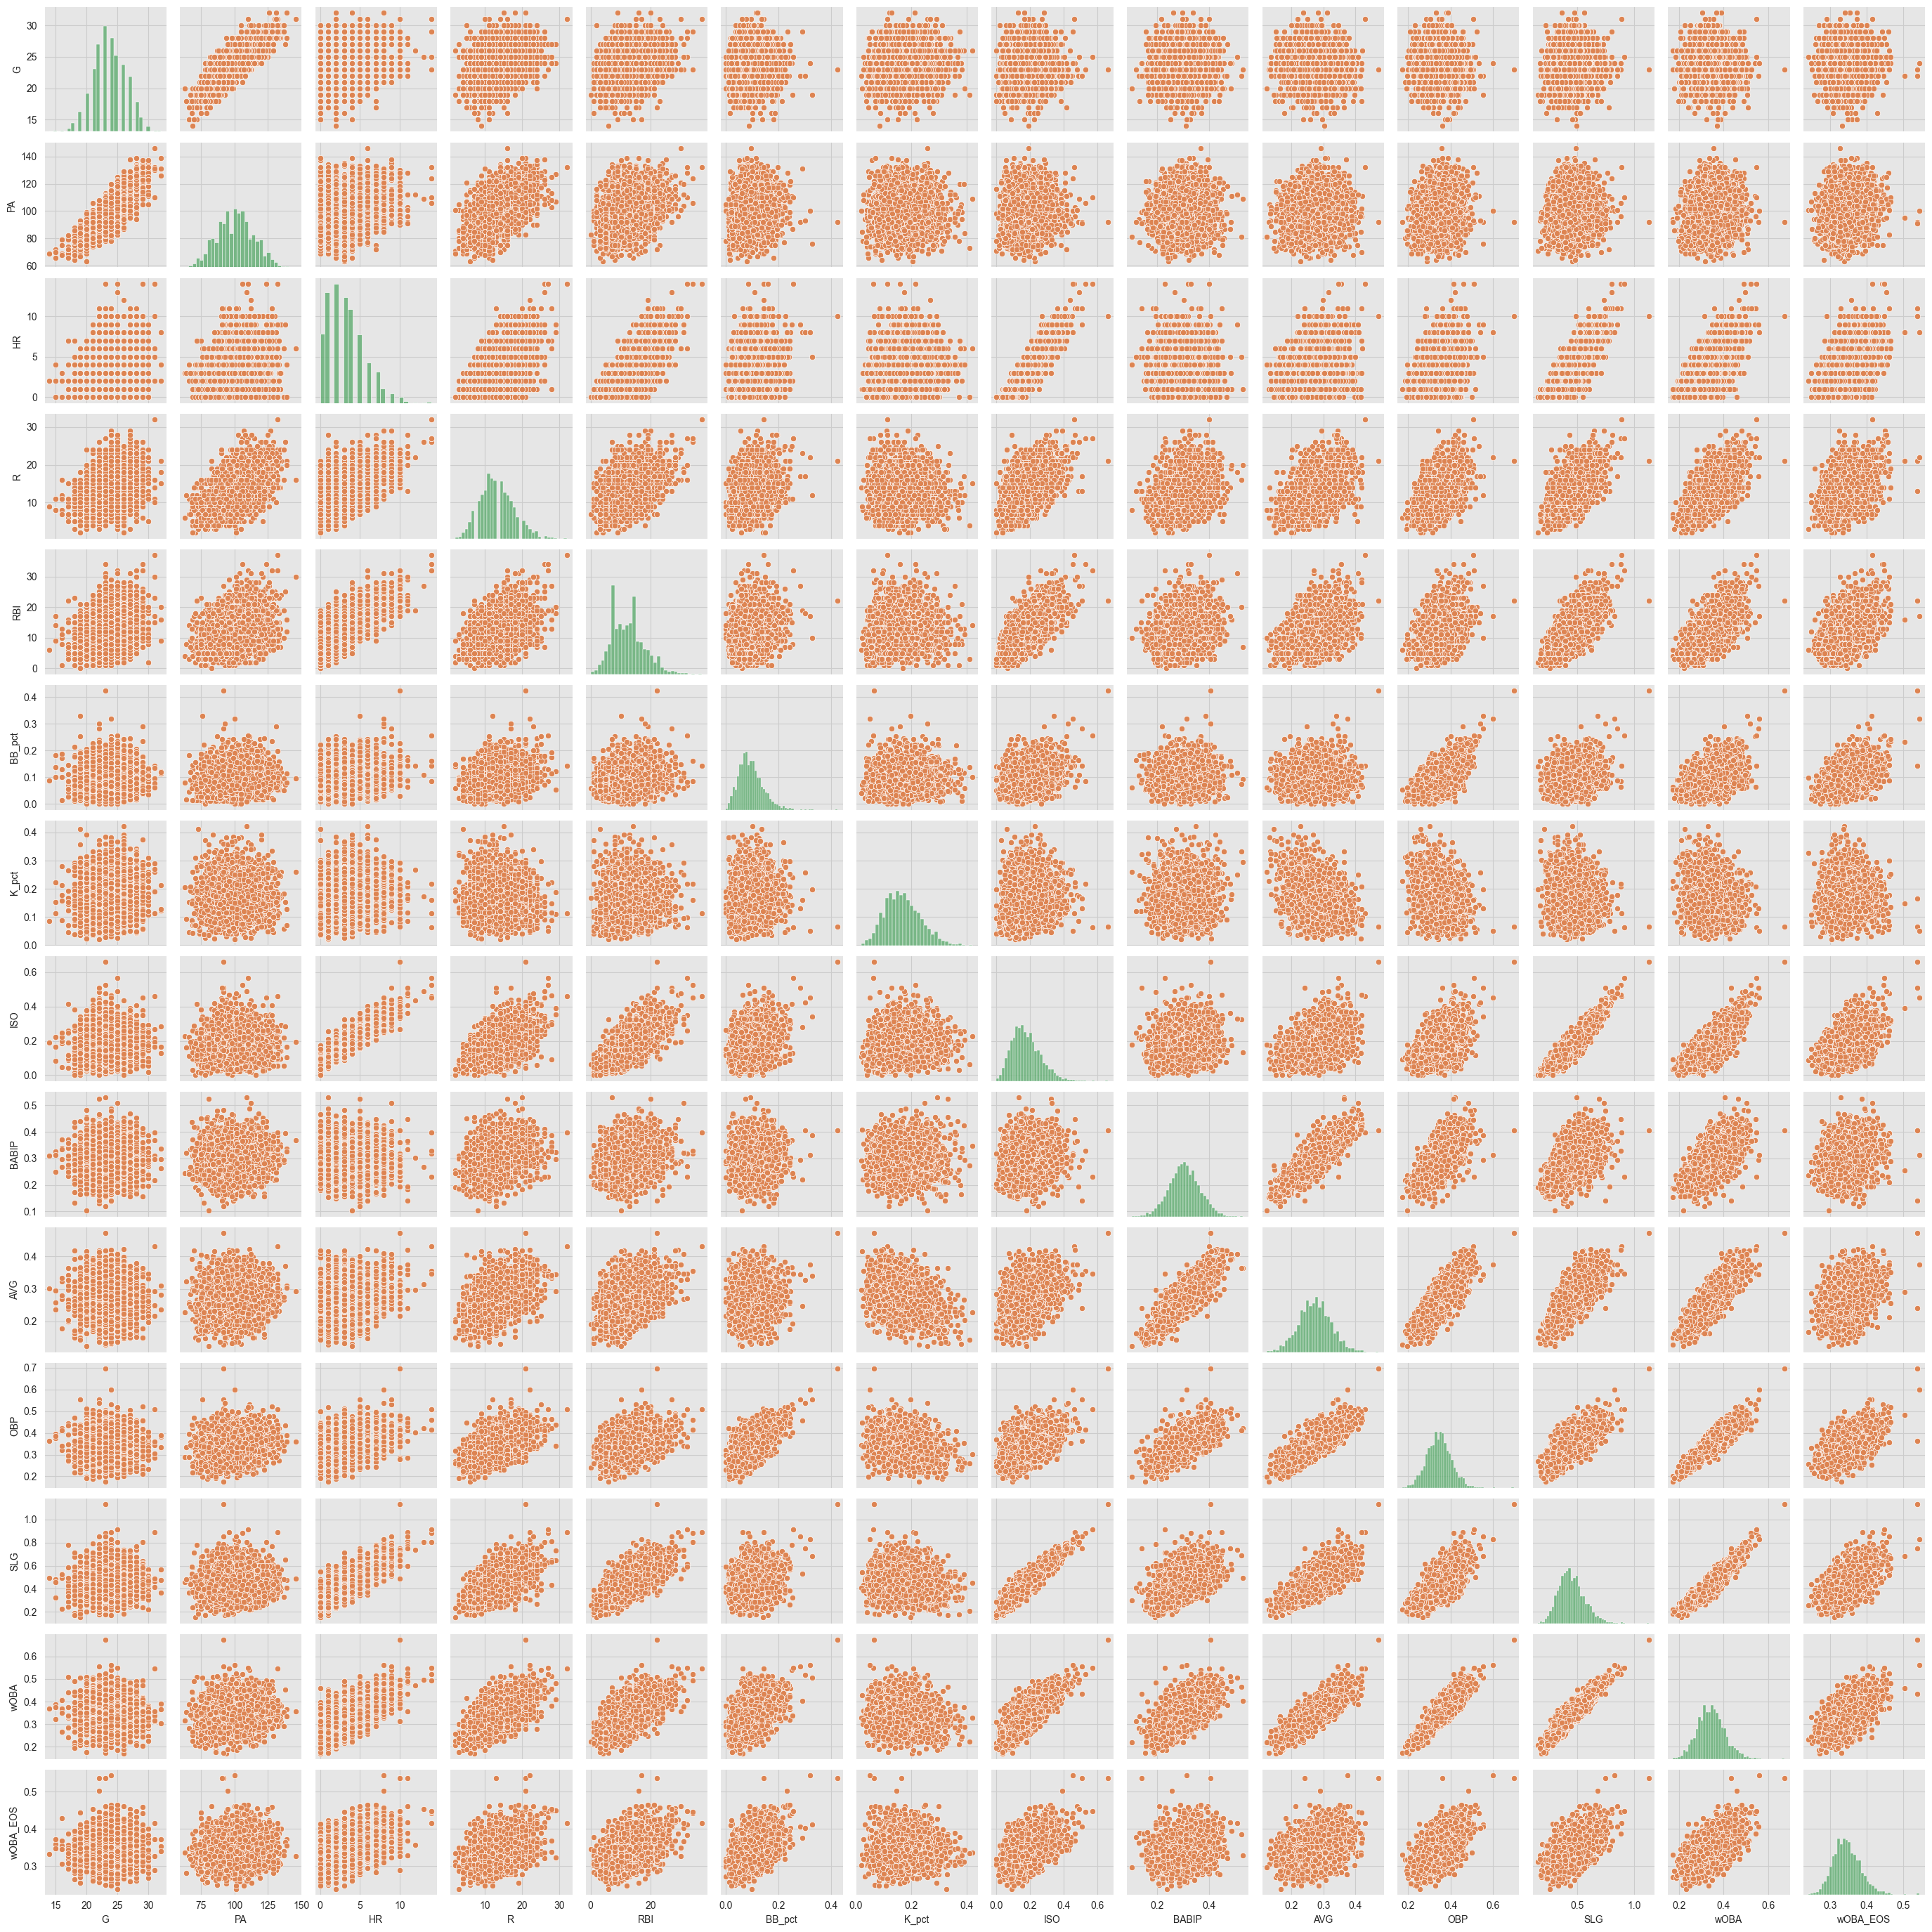

In [5]:
sns.pairplot(
    data=base_df,
    kind="scatter",
    height=2,
    plot_kws={"color": sns_c[1]},
    diag_kws={"color": sns_c[2]}
)

In [6]:
base_df = base_df[['PA', 'HR', 'R', 'RBI', 'BB_pct', 'K_pct', 'AVG', 'wOBA_EOS']]
base_df.head()


PA  HR   R  RBI  BB_pct  K_pct    AVG  wOBA_EOS
playerid Year                                                  
6184     2021  107   9  21   25   0.112  0.215  0.351     0.364
19611    2021  102   7  16   20   0.196  0.157  0.350     0.419
15429    2021  102   7  19   19   0.127  0.225  0.322     0.356
5235     2021  110   6  17   20   0.118  0.218  0.330     0.358
11739    2021   87   2   9   11   0.115  0.195  0.329     0.336

In [7]:
hist_avgs = pd.read_csv("./data/historic_avgs.csv")
hist_avgs = hist_avgs[hist_avgs["Year"] >= 1977]
hist_avgs.head()

Year  Tms  #Bat  BatAge   R/G     G      PA      AB      R      H  ...  \
0  2021   30  1373    28.4  4.53  4858  181818  161941  22010  39484  ...   
1  2020   30   618    28.0  4.65  1796   66506   59030   8344  14439  ...   
2  2019   30  1287    27.9  4.83  4858  186517  166651  23467  42039  ...   
3  2018   30  1271    28.1  4.45  4862  185139  165432  21630  41018  ...   
4  2017   30  1229    28.3  4.65  4860  185295  165567  22582  42215  ...   

      BA    OBP    SLG    OPS     TB     GDP     HBP     SH      SF    IBB  
0  0.244  0.317  0.411  0.728  66521  3328.0  2112.0  766.0  1143.0  703.0  
1  0.245  0.322  0.418  0.740  24656  1237.0   821.0  126.0   402.0  202.0  
2  0.252  0.323  0.435  0.758  72468  3463.0  1984.0  776.0  1150.0  753.0  
3  0.248  0.318  0.409  0.728  67731  3457.0  1922.0  823.0  1235.0  929.0  
4  0.255  0.324  0.426  0.750  70517  3804.0  1763.0  925.0  1168.0  970.0  

[5 rows x 28 columns]

In [8]:
hist_avgs["PA/Player/quarter"] = (hist_avgs["PA"] / hist_avgs["#Bat"]) / 4
hist_avgs["HR/Player/quarter"] = (hist_avgs["HR"] / hist_avgs["#Bat"]) / 4
hist_avgs["R/Player/quarter"] = (hist_avgs["R"] / hist_avgs["#Bat"]) / 4
hist_avgs["RBI/Player/quarter"] = (hist_avgs["RBI"].astype("int64") / hist_avgs["#Bat"]) / 4
hist_avgs["BB_pct"] = hist_avgs["BB"] / hist_avgs["PA"]
hist_avgs["K_pct"] = hist_avgs["SO"] / hist_avgs["PA"]

hist_avgs[["PA/Player/quarter", "HR/Player/quarter", "R/Player/quarter", "RBI/Player/quarter", "BB_pct", "K_pct", "BA"]].describe()


PA/Player/quarter  HR/Player/quarter  R/Player/quarter  \
count          45.000000          45.000000         45.000000   
mean           43.911072           1.096753          5.161541   
std             6.863646           0.138115          0.751986   
min            26.903722           0.610768          3.375405   
25%            39.481032           1.025031          4.593572   
50%            41.756185           1.098544          5.144366   
75%            50.198557           1.187390          5.795556   
max            55.455740           1.400126          6.470609   

       RBI/Player/quarter     BB_pct      K_pct         BA  
count           45.000000  45.000000  45.000000  45.000000  
mean             4.879814   0.085469   0.168723   0.259956  
std              0.685673   0.003974   0.030086   0.006762  
min              3.227346   0.076225   0.124924   0.244000  
25%              4.383751   0.083746   0.147782   0.255000  
50%              4.896127   0.085220   0.164805   0.261000  
75%              5.431174   0.087070   0.184885   0.265000  
max              6.071231   0.095853   0.234355   0.271000

In [9]:
base_df.describe()

PA           HR            R          RBI       BB_pct  \
count  2560.000000  2560.000000  2560.000000  2560.000000  2560.000000   
mean    100.586328     3.199219    13.193750    12.514062     0.094924   
std      13.542155     2.342365     4.495489     5.410304     0.045615   
min      63.000000     0.000000     2.000000     0.000000     0.000000   
25%      91.000000     1.000000    10.000000     8.000000     0.063000   
50%     100.000000     3.000000    13.000000    12.000000     0.089000   
75%     110.000000     5.000000    16.000000    16.000000     0.121000   
max     146.000000    14.000000    32.000000    37.000000     0.424000   

             K_pct          AVG     wOBA_EOS  
count  2560.000000  2560.000000  2560.000000  
mean      0.170351     0.273423     0.345093  
std       0.063937     0.049607     0.037040  
min       0.020000     0.123000     0.239000  
25%       0.124000     0.240000     0.319000  
50%       0.165000     0.273000     0.342000  
75%       0.212000     0.306000     0.369000  
max       0.422000     0.472000     0.544000

In [10]:
scaler = StandardScaler()
X = scaler.fit_transform(base_df[['PA', 'HR', 'R', 'RBI', 'BB_pct', 'K_pct', 'AVG']])
y = base_df[["wOBA_EOS"]]

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.9, random_state=1234)


In [11]:
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
base_pred = lin_reg.predict(X_test)

In [12]:
# The coefficients
print("Coefficients: \n", lin_reg.coef_)
# The mean squared error
print("Mean squared error: %.3f" %
      mean_squared_error(y_test, base_pred))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.3f" %
      r2_score(y_test, base_pred))

Coefficients: 
 [[-2.08434634e-03  9.63157307e-03  9.91406416e-04  5.37107283e-03
   1.15548348e-02  4.54140254e-05  8.01609378e-03]]
Mean squared error: 0.001
Coefficient of determination: 0.420


In [13]:
X2 = sm.add_constant(X_train)
est = sm.OLS(y_train, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:               wOBA_EOS   R-squared:                       0.402
Model:                            OLS   Adj. R-squared:                  0.400
Method:                 Least Squares   F-statistic:                     220.8
Date:                Sun, 05 Dec 2021   Prob (F-statistic):          3.38e-251
Time:                        20:43:38   Log-Likelihood:                 4927.1
No. Observations:                2304   AIC:                            -9838.
Df Residuals:                    2296   BIC:                            -9792.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3449      0.001    579.635      0.0

In [14]:
# Define model formula.
formula = "wOBA_EOS ~ PA + HR + R + RBI + BB_pct + K_pct + AVG"
# Create features.
y_bayes, X_bayes = patsy.dmatrices(formula_like=formula, data=base_df)
y_bayes = np.asarray(y_bayes).flatten()
labels = X_bayes.design_info.column_names
X_bayes = np.asarray(X_bayes)

In [15]:
print(f"labels = {labels}")

labels = ['Intercept', 'PA', 'HR', 'R', 'RBI', 'BB_pct', 'K_pct', 'AVG']


In [16]:
X_train_bayes, X_test_bayes, y_train_bayes, y_test_bayes = train_test_split(X_bayes, y_bayes, train_size=0.9, random_state=1234)

In [17]:
with pm.Model() as model:
    # Set data container.
    data = pm.Data("data", X_train_bayes)
    # Set priors.
    priors = {
        'Intercept': pm.Normal.dist(mu=0, sd=5),
        'PA': pm.Normal.dist(mu=0, sd=5),
        'HR': pm.Normal.dist(mu=0, sd=5),
        'R': pm.Normal.dist(mu=0, sd=5),
        'RBI': pm.Normal.dist(mu=0, sd=5),
        'BB_pct': pm.Normal.dist(mu=0, sd=5),
        'K_pct': pm.Normal.dist(mu=0, sd=5),
        'AVG': pm.Normal.dist(mu=0, sd=5)
    }
    # Specify model.
    glm.GLM(y=y_train_bayes, x=data,
            intercept=False, labels=labels, priors=priors)
    # Configure sampler.
    trace = pm.sample(25000, chains=4, cores=4, tune=1000,
                      target_accept=0.9, random_seed=1234, init="advi+adapt_diag")


/var/folders/tg/k65f_bj52wn2jhksqnm041_r0000gp/T/ipykernel_64727/2305970971.py:19: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  trace = pm.sample(25000, chains=4, cores=4, tune=1000,
Auto-assigning NUTS sampler...
Initializing NUTS using advi+adapt_diag...


Convergence achieved at 60600
Interrupted at 60,599 [30%]: Average Loss = 3.8077e+05
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [sd, AVG, K_pct, BB_pct, RBI, R, HR, PA, Intercept]


Sampling 4 chains for 1_000 tune and 25_000 draw iterations (4_000 + 100_000 draws total) took 435 seconds.


In [18]:
az.summary(trace)


Got error No model on context stack. trying to find log_likelihood in translation.
/Users/kevinlcooper/.pyenv/versions/3.9.7/lib/python3.9/site-packages/arviz/data/io_pymc3_3x.py:98: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(


mean     sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  ess_bulk  \
Intercept  0.264  0.007   0.251    0.276        0.0      0.0   45358.0   
PA        -0.000  0.000  -0.000   -0.000        0.0      0.0   53353.0   
HR         0.004  0.000   0.003    0.005        0.0      0.0   63205.0   
R          0.000  0.000  -0.000    0.001        0.0      0.0   63077.0   
RBI        0.001  0.000   0.001    0.001        0.0      0.0   63591.0   
BB_pct     0.253  0.014   0.228    0.280        0.0      0.0   88535.0   
K_pct      0.001  0.010  -0.019    0.020        0.0      0.0   70563.0   
AVG        0.162  0.015   0.132    0.190        0.0      0.0   55076.0   
sd         0.029  0.000   0.028    0.029        0.0      0.0   82008.0   

           ess_tail  r_hat  
Intercept   57592.0    1.0  
PA          61322.0    1.0  
HR          67527.0    1.0  
R           68683.0    1.0  
RBI         68073.0    1.0  
BB_pct      69664.0    1.0  
K_pct       67174.0    1.0  
AVG         65751.0    1.0  
sd          67762.0    1.0

Got error No model on context stack. trying to find log_likelihood in translation.
/Users/kevinlcooper/.pyenv/versions/3.9.7/lib/python3.9/site-packages/arviz/data/io_pymc3_3x.py:98: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(
Got error No model on context stack. trying to find log_likelihood in translation.


array([[<AxesSubplot:title={'center':'Intercept'}>,
        <AxesSubplot:title={'center':'Intercept'}>],
       [<AxesSubplot:title={'center':'PA'}>,
        <AxesSubplot:title={'center':'PA'}>],
       [<AxesSubplot:title={'center':'HR'}>,
        <AxesSubplot:title={'center':'HR'}>],
       [<AxesSubplot:title={'center':'R'}>,
        <AxesSubplot:title={'center':'R'}>],
       [<AxesSubplot:title={'center':'RBI'}>,
        <AxesSubplot:title={'center':'RBI'}>],
       [<AxesSubplot:title={'center':'BB_pct'}>,
        <AxesSubplot:title={'center':'BB_pct'}>],
       [<AxesSubplot:title={'center':'K_pct'}>,
        <AxesSubplot:title={'center':'K_pct'}>],
       [<AxesSubplot:title={'center':'AVG'}>,
        <AxesSubplot:title={'center':'AVG'}>],
       [<AxesSubplot:title={'center':'sd'}>,
        <AxesSubplot:title={'center':'sd'}>]], dtype=object)

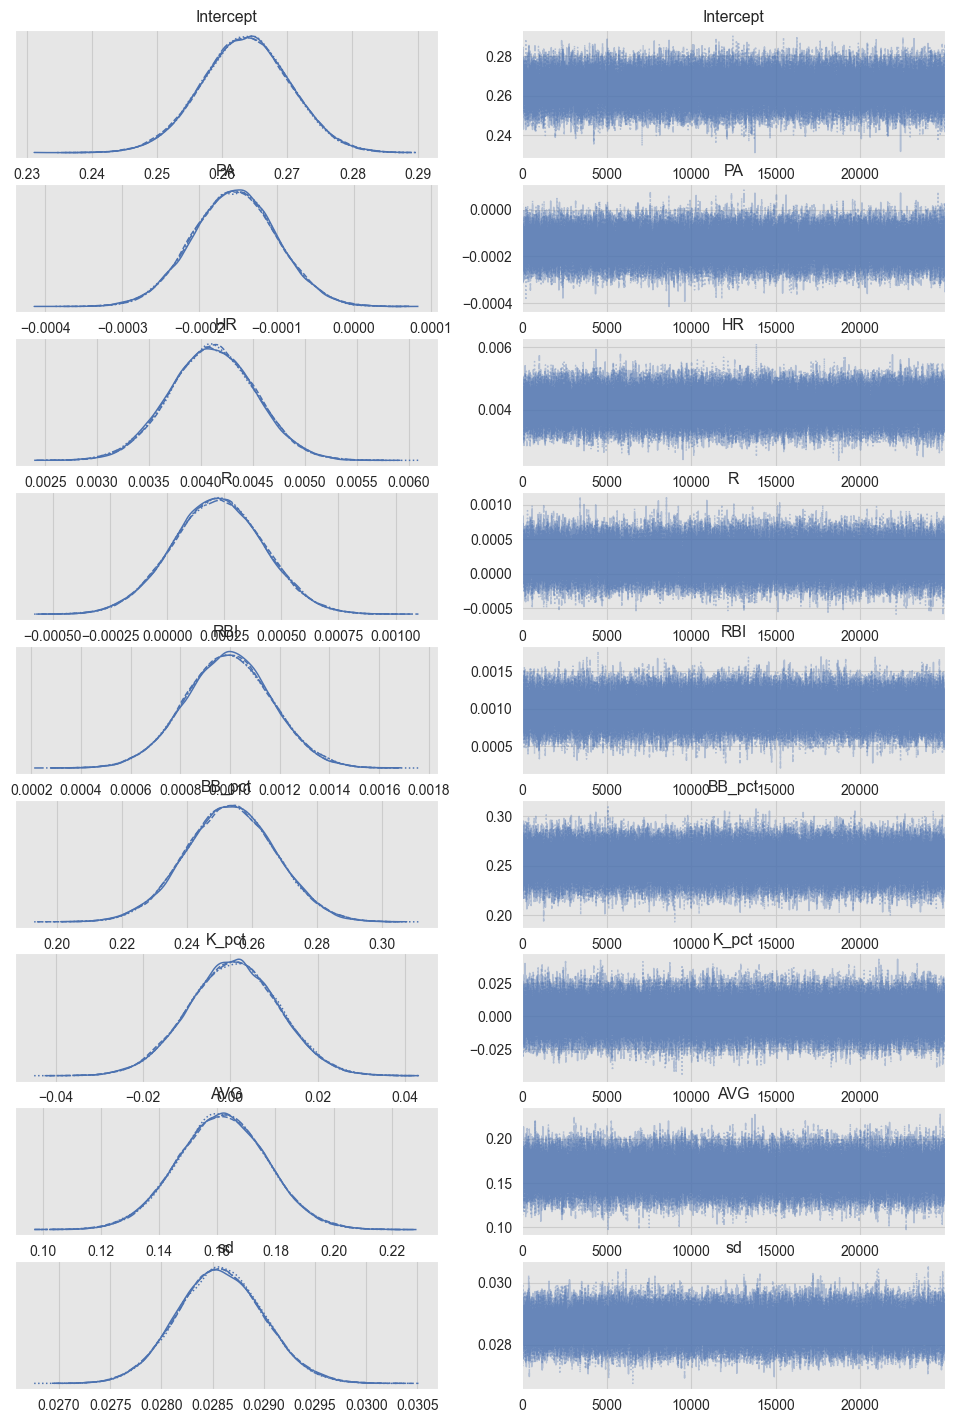

In [19]:
# Plot chains.
az.plot_trace(data=trace)


In [20]:
# Update data reference.
pm.set_data({"data": X_test_bayes}, model=model)
# Generate posterior samples.
ppc_test = pm.sample_posterior_predictive(trace, model=model)

In [21]:
# Compute the point prediction by taking the mean
# and defining the category via a threshold.
bayes_pred = ppc_test["y"].mean(axis=0)

In [22]:
# The mean squared error
print("Mean squared error: %.3f" %
      mean_squared_error(y_test_bayes, bayes_pred))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.3f" %
      r2_score(y_test_bayes, bayes_pred))

Mean squared error: 0.001
Coefficient of determination: 0.421


In [23]:
hist_avgs[["PA/Player/quarter", "HR/Player/quarter", "R/Player/quarter",
           "RBI/Player/quarter", "BB_pct", "K_pct", "BA"]].describe()

PA/Player/quarter  HR/Player/quarter  R/Player/quarter  \
count          45.000000          45.000000         45.000000   
mean           43.911072           1.096753          5.161541   
std             6.863646           0.138115          0.751986   
min            26.903722           0.610768          3.375405   
25%            39.481032           1.025031          4.593572   
50%            41.756185           1.098544          5.144366   
75%            50.198557           1.187390          5.795556   
max            55.455740           1.400126          6.470609   

       RBI/Player/quarter     BB_pct      K_pct         BA  
count           45.000000  45.000000  45.000000  45.000000  
mean             4.879814   0.085469   0.168723   0.259956  
std              0.685673   0.003974   0.030086   0.006762  
min              3.227346   0.076225   0.124924   0.244000  
25%              4.383751   0.083746   0.147782   0.255000  
50%              4.896127   0.085220   0.164805   0.261000  
75%              5.431174   0.087070   0.184885   0.265000  
max              6.071231   0.095853   0.234355   0.271000

In [24]:
with pm.Model() as model_2:
    # Set data container.
    data_2 = pm.Data("data", X_train_bayes)
    # Set priors.
    priors_2 = {
        'Intercept': pm.Normal.dist(mu=0, sd=5),
        'PA': pm.Normal.dist(mu=88, sd=14),
        'HR': pm.Lognormal.dist(mu=-2.4, tau=5.1),
        'R': pm.Normal.dist(mu=10, sd=2),
        'RBI': pm.Normal.dist(mu=10, sd=2),
        'BB_pct': pm.Normal.dist(mu=0.085, sd=0.004),
        'K_pct': pm.Normal.dist(mu=0.25, sd=0.5),
        'AVG': pm.Normal.dist(mu=0.26, sd=0.007)
    }
    # Specify model.
    glm.GLM(y=y_train_bayes, x=data_2,
            intercept=False, labels=labels, priors=priors_2)
    # Configure sampler.
    trace_2 = pm.sample(25000, chains=4, cores=4, tune=1000,
                      target_accept=0.9, random_seed=1234, init="advi+adapt_diag")


/var/folders/tg/k65f_bj52wn2jhksqnm041_r0000gp/T/ipykernel_64727/1483476940.py:19: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  trace_2 = pm.sample(25000, chains=4, cores=4, tune=1000,
Auto-assigning NUTS sampler...
Initializing NUTS using advi+adapt_diag...


Convergence achieved at 48700
Interrupted at 48,699 [24%]: Average Loss = 8.8167e+09
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [sd, AVG, K_pct, BB_pct, RBI, R, HR, PA, Intercept]


Sampling 4 chains for 1_000 tune and 25_000 draw iterations (4_000 + 100_000 draws total) took 528 seconds.


In [25]:
az.summary(trace_2)

Got error No model on context stack. trying to find log_likelihood in translation.
/Users/kevinlcooper/.pyenv/versions/3.9.7/lib/python3.9/site-packages/arviz/data/io_pymc3_3x.py:98: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(


mean     sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  ess_bulk  \
Intercept  0.249  0.005   0.239    0.259        0.0      0.0   60343.0   
PA        -0.000  0.000  -0.000    0.000        0.0      0.0   58932.0   
R          0.000  0.000  -0.000    0.000        0.0      0.0   75459.0   
RBI        0.000  0.000   0.000    0.001        0.0      0.0   71208.0   
BB_pct     0.098  0.004   0.090    0.105        0.0      0.0   92270.0   
K_pct      0.026  0.010   0.007    0.044        0.0      0.0   89343.0   
AVG        0.242  0.006   0.231    0.255        0.0      0.0   85232.0   
HR         0.005  0.000   0.005    0.006        0.0      0.0   68882.0   
sd         0.030  0.000   0.029    0.030        0.0      0.0   96429.0   

           ess_tail  r_hat  
Intercept   61499.0    1.0  
PA          64621.0    1.0  
R           71640.0    1.0  
RBI         68001.0    1.0  
BB_pct      70319.0    1.0  
K_pct       73279.0    1.0  
AVG         71125.0    1.0  
HR          66742.0    1.0  
sd          68273.0    1.0

Got error No model on context stack. trying to find log_likelihood in translation.
/Users/kevinlcooper/.pyenv/versions/3.9.7/lib/python3.9/site-packages/arviz/data/io_pymc3_3x.py:98: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(
Got error No model on context stack. trying to find log_likelihood in translation.


array([[<AxesSubplot:title={'center':'Intercept'}>,
        <AxesSubplot:title={'center':'Intercept'}>],
       [<AxesSubplot:title={'center':'PA'}>,
        <AxesSubplot:title={'center':'PA'}>],
       [<AxesSubplot:title={'center':'R'}>,
        <AxesSubplot:title={'center':'R'}>],
       [<AxesSubplot:title={'center':'RBI'}>,
        <AxesSubplot:title={'center':'RBI'}>],
       [<AxesSubplot:title={'center':'BB_pct'}>,
        <AxesSubplot:title={'center':'BB_pct'}>],
       [<AxesSubplot:title={'center':'K_pct'}>,
        <AxesSubplot:title={'center':'K_pct'}>],
       [<AxesSubplot:title={'center':'AVG'}>,
        <AxesSubplot:title={'center':'AVG'}>],
       [<AxesSubplot:title={'center':'HR'}>,
        <AxesSubplot:title={'center':'HR'}>],
       [<AxesSubplot:title={'center':'sd'}>,
        <AxesSubplot:title={'center':'sd'}>]], dtype=object)

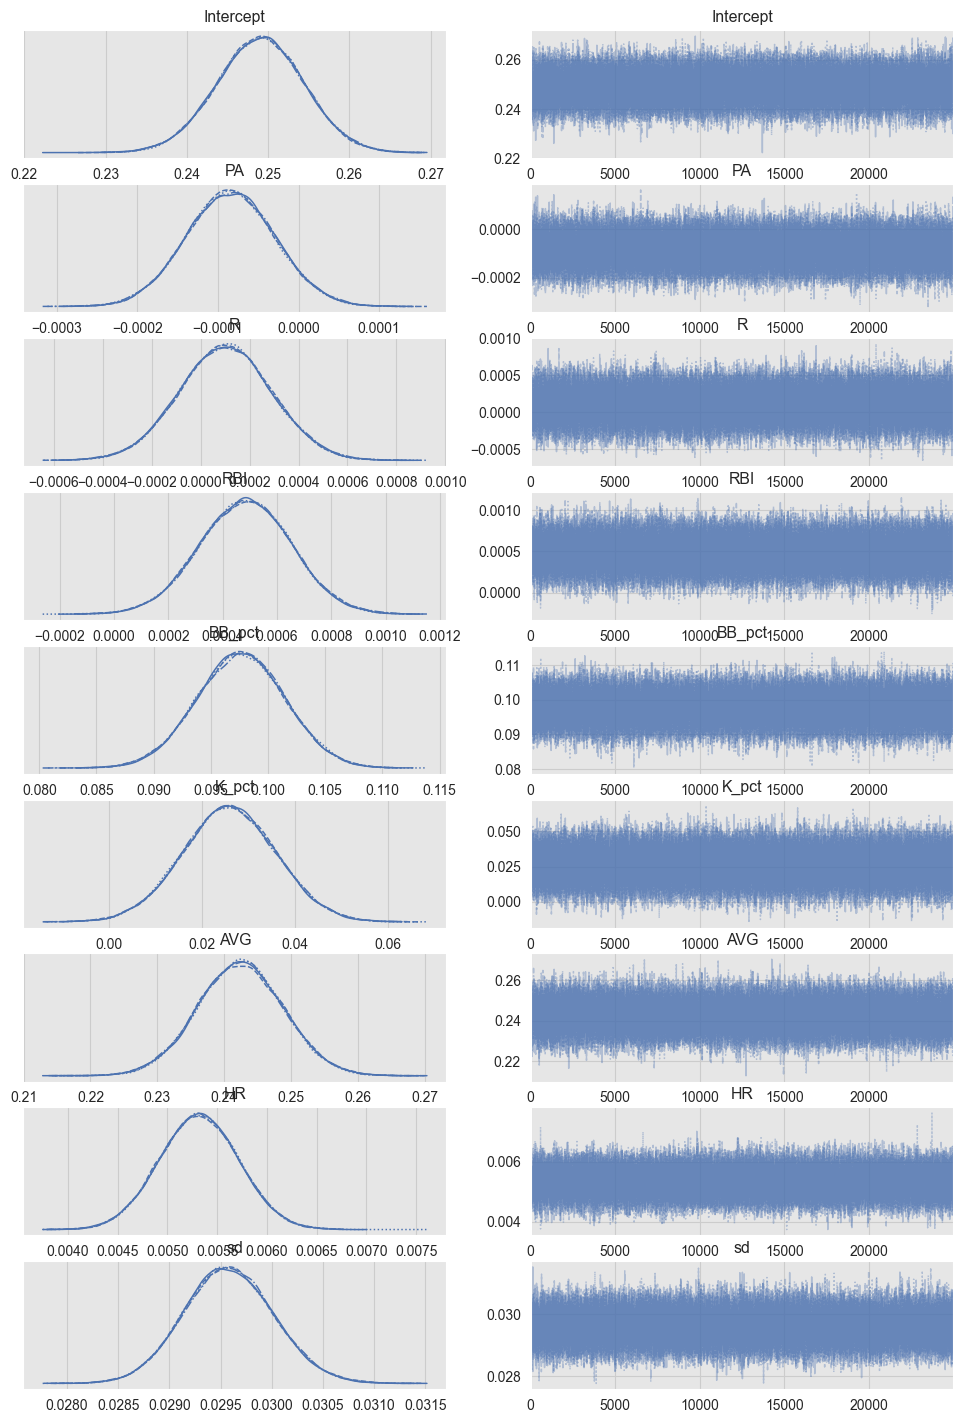

In [26]:
# Plot chains.
az.plot_trace(data=trace_2)


In [27]:
# Update data reference.
pm.set_data({"data": X_test_bayes}, model=model_2)
# Generate posterior samples.
ppc_test_2 = pm.sample_posterior_predictive(trace_2, model=model_2)


In [28]:
# Compute the point prediction by taking the mean
# and defining the category via a threshold.
bayes_pred_2 = ppc_test_2["y"].mean(axis=0)

In [29]:
# The mean squared error
print("Mean squared error: %.3f" %
      mean_squared_error(y_test_bayes, bayes_pred_2))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.3f" %
      r2_score(y_test_bayes, bayes_pred_2))


Mean squared error: 0.001
Coefficient of determination: 0.341
